<a href="https://colab.research.google.com/github/Svetorus/Computer_vision/blob/master/DP_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cifar10 with CNN

In [0]:
from __future__ import print_function
import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os
import numpy as np

Using TensorFlow backend.


In [0]:
# установка параметров нейросети
batch_size = 30
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [0]:
# разделение тренировочной и тестовой выборки
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'тренировочные примеры')
print(test_images.shape[0], 'тестовые примеры')

train_images shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Automobile</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Bird</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Cat</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Deer</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Dog</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Frog</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Horse</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Ship</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Truck</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [0]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Посмотрим первые 25 изображений:

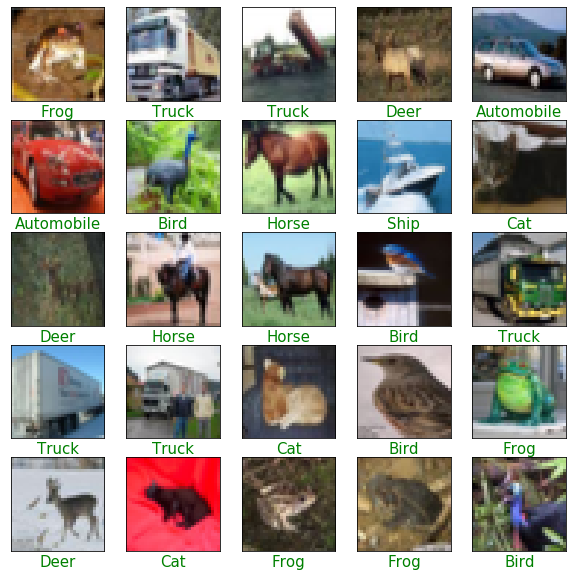

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]],fontsize=15,color='g')
plt.show()

In [0]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [0]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))
model.add(Conv2D(64, (5, 5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), (2, 2)))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [0]:
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [0]:
# обучение модели
model.fit(train_images, train_labels, epochs=epochs,batch_size=batch_size);

Epoch 1/5
50000/50000 [==============================] - 45s 900us/step - loss: 1.6899 - accuracy: 0.3960
Epoch 2/5
50000/50000 [==============================] - 45s 905us/step - loss: 1.3661 - accuracy: 0.5152
Epoch 3/5
50000/50000 [==============================] - 50s 1ms/step - loss: 1.2122 - accuracy: 0.5718
Epoch 4/5
50000/50000 [==============================] - 48s 963us/step - loss: 1.1074 - accuracy: 0.6121
Epoch 5/5
50000/50000 [==============================] - 46s 924us/step - loss: 1.0261 - accuracy: 0.6423


In [0]:
# проверка работы обученной модели
scores = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 367us/step
Test loss: 1.0524021770477294
Test accuracy: 0.6302000284194946


### Проверка предсказаний

In [0]:
probability_model = keras.Sequential([model, 
                                         keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Давайте сделаем еще несколько предсказаний -

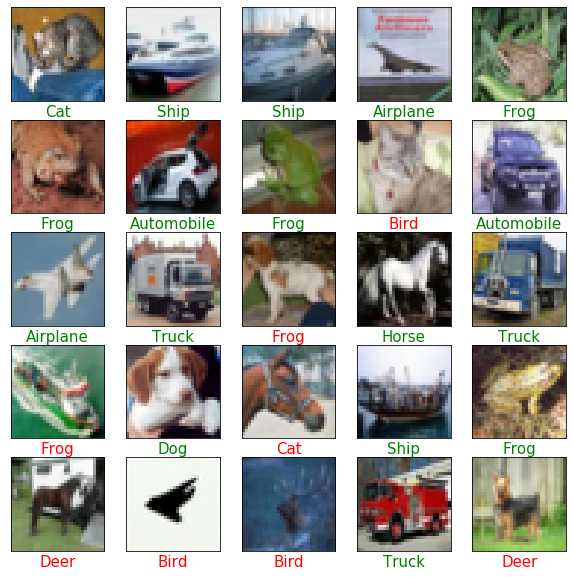

In [0]:
# Вывод нескольких картинок 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    if class_names[np.argmax(predictions[i])] == class_names[np.argmax(test_labels[i])]:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='g',fontsize=15)
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='r',fontsize=15)

Matplotlib нам дает возможность посмотреть наше предсказание графически:

Функции для вывода изображений

In [0]:
# Функция вывода катринки с проверкой предсказания  
def picture(i, predictions_array, true_label, img):
    if class_names[np.argmax(predictions_array)] == class_names[np.argmax(true_label)]:
        plt.imshow(img)
        plt.xlabel(class_names[np.argmax(predictions_array)],color='g',fontsize=15)
        plt.ylabel('Correct',color='g',fontsize=15)
    else:
        plt.imshow(img)
        plt.xlabel(class_names[np.argmax(predictions_array)],color='r',fontsize=15)
        plt.ylabel('False',color='r',fontsize=15)
# Функция для графического предсказания с цифрами
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
#    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    if class_names[np.argmax(predictions[i])] == class_names[np.argmax(true_label)]:
        thisplot[predicted_label].set_color('g')
    else:
        thisplot[predicted_label].set_color('r')
        thisplot[np.argmax(true_label)].set_color('g')
        
# Функция вывода графического предсказания с расшифровкой цифр       
def image(i,predic,label):
    thisplot = plt.bar(range(10), predic, color="#777777")
    predicted_label = np.argmax(predic)
    if class_names[predicted_label] == class_names[np.argmax(label)]:
        thisplot[predicted_label].set_color('g')
        plt.xticks(range(10), class_names, rotation=45)
    else:
        thisplot[predicted_label].set_color('r')
        thisplot[np.argmax(label)].set_color('g')
        plt.xticks(range(10), class_names, rotation=45)

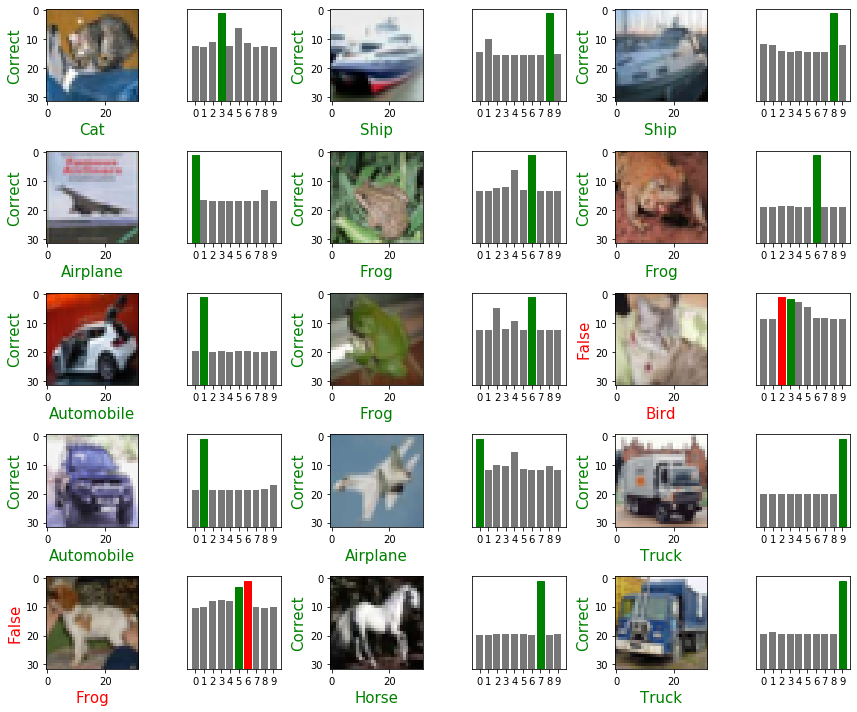

In [0]:
# Вывод картинок и графического предсказания
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i])
    if class_names[np.argmax(predictions[i])] == class_names[np.argmax(test_labels[i])]:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='g',fontsize=15)
        plt.ylabel('Correct',color='g',fontsize=15)
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])],color='r',fontsize=15)
        plt.ylabel('False',color='r',fontsize=15)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels[i])# функция "plot_value_array"
plt.tight_layout()

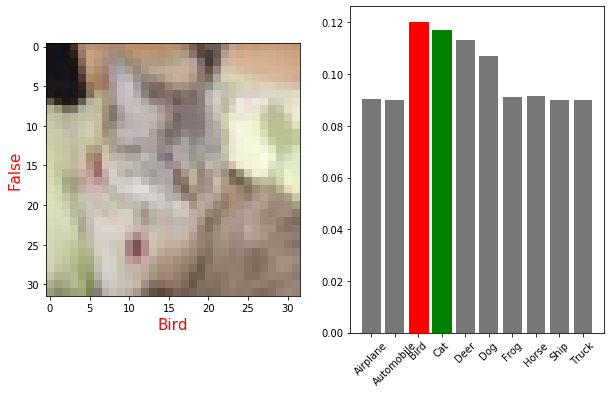

In [0]:
# Вывод картинки и графического предсказания с расшифровкой цифр
i = 8 # номер картинки
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
picture(i, predictions[i], test_labels[i], test_images[i]) # функция "picture"
plt.subplot(1,2,2)
image(i,predictions[i],test_labels[i])# функция "image"

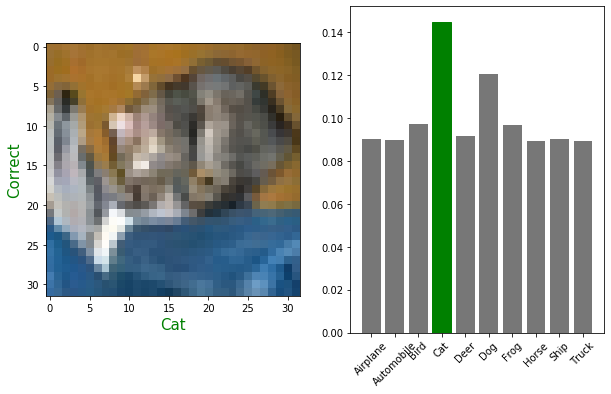

In [0]:
# Вывод картинки и графического предсказания с расшифровкой цифр
i = 0 # номер картинки
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
picture(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
image(i,predictions[i],test_labels[i])

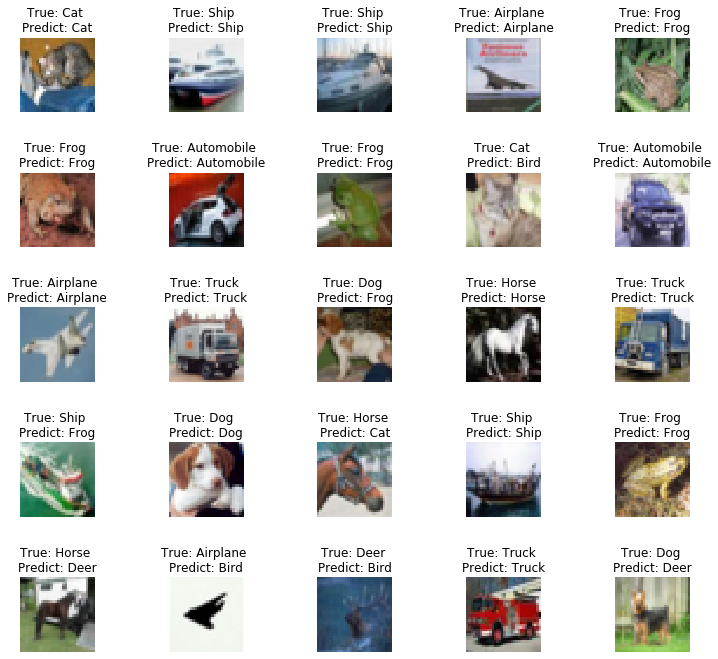

In [0]:
# Вывод нескольких картинок c верным и предсказанным названием картинки
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[np.argmax(predictions[i])]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)